In [11]:
import pandas as pd
import random as rd
from matplotlib import pyplot as plt
from scipy.stats import norm, binom
import numpy as np
import time

In [ ]:
population_size = 16384

In [12]:
def survive_rate(threshold:float, mu:float, sigma:float) -> float:
    return 1 - norm.cdf(threshold, mu, sigma)

def expectation_hawk(h:float) -> float:
    return -25*h + 45*(1-h)

def expectation_dove(h:float) -> float:
    return 5*h + 15*(1-h)

def std_hawk(h:float, p:int) -> float:
    return (p**-0.5) * ((5400*h + 225)**0.5)

def std_dove(h:float, p:int) -> float:
    return (p**-0.5) * ((-400*h + 625)**0.5)

In [13]:
threshold_space = np.linspace(-40, 20, 128)

In [ ]:
sample_points = []
simulation_rounds = 16
tests_for_each_threshold = 128

for threshold_i in threshold_space:
    t0 = time.time()
    for timeline_i in range(tests_for_each_threshold):
        h_i = rd.random()
        extinction = False
        for i in range(simulation_rounds):
            mu_hawk = expectation_hawk(h = h_i)
            sigma_hawk = std_hawk(h = h_i, p = population_size)
            mu_dove = expectation_dove(h_i)
            sigma_dove = std_dove(h = h_i, p = population_size)
            survive_rate_hawk = survive_rate(threshold = threshold_i, mu = mu_hawk, sigma = sigma_hawk)
            survive_rate_dove = survive_rate(threshold = threshold_i, mu = mu_dove, sigma = sigma_dove)
            hawks_survived = binom(int(round(
                                    population_size*(h_i), 
                                    0)), 
                                    survive_rate_hawk).rvs()
            doves_survived = binom(int(round(
                                    population_size*(1-h_i), 
                                    0)), 
                                    survive_rate_dove).rvs()
            truncated_population_size = hawks_survived + doves_survived
            if truncated_population_size == 0: extinction = True; break
            h_i = hawks_survived / truncated_population_size
        if not extinction: sample_points.append([threshold_i, h_i])
    t = time.time()
    print("Threshold = {} took: {}s".format(threshold_i, t-t0))

sample_as_df = pd.DataFrame(sample_points)
print(sample_as_df)

Threshold = -40.0 took: 2.3833484649658203s
Threshold = -39.52755905511811 took: 2.142733335494995s
Threshold = -39.05511811023622 took: 2.2757387161254883s
Threshold = -38.58267716535433 took: 2.144641160964966s
Threshold = -38.110236220472444 took: 2.206697463989258s
Threshold = -37.63779527559055 took: 2.2073564529418945s
Threshold = -37.16535433070866 took: 2.154406785964966s
Threshold = -36.69291338582677 took: 2.261023759841919s
Threshold = -36.22047244094488 took: 2.1120221614837646s
Threshold = -35.74803149606299 took: 2.143336534500122s
Threshold = -35.275590551181104 took: 2.2421727180480957s
Threshold = -34.803149606299215 took: 2.247659206390381s
Threshold = -34.330708661417326 took: 2.2165396213531494s
Threshold = -33.85826771653544 took: 2.277435541152954s
Threshold = -33.38582677165354 took: 2.050294876098633s
Threshold = -32.91338582677165 took: 2.0792853832244873s
Threshold = -32.44094488188976 took: 2.5499022006988525s
Threshold = -31.968503937007874 took: 2.054127931

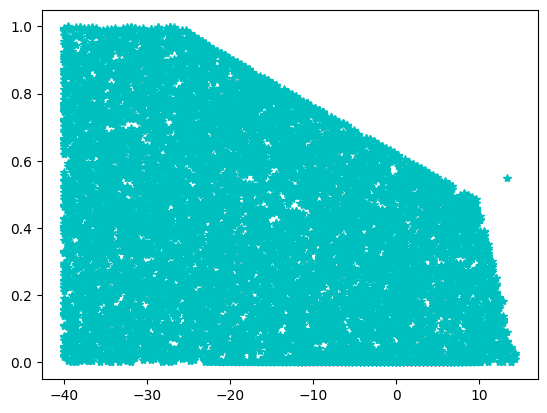

In [15]:
plt.cla()
for sample_point in sample_points: plt.plot(sample_point[0], sample_point[1], "c*")
plt.show()